In [ ]:
"""
1/2/21

Purpose: To experiment how to make annotations in neuroglancer

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from annotationframeworkclient import FrameworkClient
from nglui import statebuilder

In [3]:
client = FrameworkClient('minnie65_phase3_v1')
split_locs = [[135975, 104575, 22699],
              [146291, 126873, 20716]]
root_ids = [864691135855627566, 864691135855627566]
priority = [2, 1]
# Dummy split dataframe
edit_df = pd.DataFrame({'split_location': split_locs,
                        'root_id': root_ids,
                        'priority': priority})

# The following generates a statebuilder that can turn dataframes into neuroglancer states
img_layer = statebuilder.ImageLayerConfig(client.info.image_source(), contrast_controls=True, black=0.35, white=0.65)
seg_layer = statebuilder.SegmentationLayerConfig(client.info.segmentation_source(), selected_ids_column='root_id')
pts = statebuilder.PointMapper('split_location', linked_segmentation_column='root_id', set_position=True)
anno_layer = statebuilder.AnnotationLayerConfig('split_cands', mapping_rules=pts, linked_segmentation_layer=seg_layer.name, color='#FFFFFF', active=True)
sb = statebuilder.StateBuilder([img_layer, seg_layer, anno_layer], state_server=client.state.state_service_endpoint)

In [ ]:
chained_sb = ChainedStateBuilder([postsyn_sb, presyn_sb])

In [ ]:
# To test locally:
# Note that the annotations are created in order, so sorting the dataframe should sort the annotations
sb.render_state(edit_df.sort_values(by='priority'), return_as='html')

In [ ]:
# # To upload to the state server for a shortened URL:
# state = sb.render_state(edit_df.sort_values(by='priority'), return_as='dict')
# state_id = client.state.upload_state_json(state)
# short_url = client.state.build_neuroglancer_url(state_id, ngl_url=client.info.viewer_site())
# print(short_url)

# Function for Generating Neuroglancer Link

In [ ]:
import numpy as np
import numpy_utils as nu

def set_state_builder():
    client = FrameworkClient('minnie65_phase3_v1')
    # The following generates a statebuilder that can turn dataframes into neuroglancer states
    img_layer = statebuilder.ImageLayerConfig(client.info.image_source(), contrast_controls=True, black=0.35, white=0.65)
    seg_layer = statebuilder.SegmentationLayerConfig(client.info.segmentation_source(), selected_ids_column='root_id')
    pts = statebuilder.PointMapper('split_location', linked_segmentation_column='root_id', set_position=True)
    anno_layer = statebuilder.AnnotationLayerConfig('split_cands', mapping_rules=pts, linked_segmentation_layer=seg_layer.name, color='#FFFFFF', active=True)
    sb = statebuilder.StateBuilder([img_layer, seg_layer, anno_layer], state_server=client.state.state_service_endpoint)
    return sb

def set_edit_dataframe(split_locs,
                      root_ids,
                      priority=None,
                      ):
    """
    Will create a dataframe that can be fed into a statebuilder
    to generate a neuroglancer link
    
    """
    if priority is None:
        priority = list(np.arange(1,len(split_locs)+1))
        
    if not nu.is_array_like(root_ids):
        root_ids = [root_ids]*len(split_locs)
        
    edit_df = pd.DataFrame({'split_location': split_locs,
                            'root_id': root_ids,
                            'priority': priority})
    return edit_df

def neuroglancer_split_link(split_locs,
                      root_ids,
                      priority=None):
    
    edit_df = set_edit_dataframe(split_locs,
                      root_ids,
                      priority,
                      )
    
    return sb.render_state(edit_df.sort_values(by='priority'), return_as='html')
    


split_locs = [[135975, 104575, 22699],
                  [146291, 126873, 20716]]
root_ids = [864691135855627566, 864691135855627566]
root_ids = 864691135855627566
#priority = [2, 1]
# Dummy split dataframe

set_edit_dataframe(split_locs,
                  root_ids)

neuroglancer_split_link(split_locs,
                          root_ids)

# Trying the Test Setup for Getting a Neuron, Getting the suggestions for splits and then creating a neuroglancer link

In [4]:
from os import sys
sys.path.append("/meshAfterParty/")

In [5]:
import neuron_utils as nru
import neuron_visualizations as nviz

INFO - 2021-01-09 08:53:11,081 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-09 08:53:11,082 - settings - Setting database.user to celiib
INFO - 2021-01-09 08:53:11,083 - settings - Setting database.password to newceliipass
INFO - 2021-01-09 08:53:11,087 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-09 08:53:11,088 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-09 08:53:11,102 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-09 08:53:11,346 - settings - Setting enable_python_native_blobs to True


In [6]:
test_file = "864691134988472442_0_25"

curr_file_path = "/notebooks/test_neurons/Segmentation_3/Multi_Soma/" + test_file
neuron_obj = nru.decompress_neuron(curr_file_path,curr_file_path)
neuron_obj

Decompressing Neuron in minimal output mode...please wait


In [ ]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")

# Getting the Proofreading Suggestions

In [8]:
import proofreading_utils as pru

multi_soma_limbs = [1]
multi_touch_limbs = [0 1]


 -------- Working on limb 0------------
Starting combinations to process = [(73, 68)]


---- working on disconnecting 73 and 68
---- This disconnects S0_0 from S0_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
self.deleted_edges = []
self.created_edges = []
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [73, 79, 83, 80, 69, 63, 64, 65, 68]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 0 55 63 64 65 66 67 69 76 79 80 83 84 85 90 93]
Short segments to combine = []
Found 1 high degree coordinates to cut
Picking [748976. 592149. 813833.] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [69, 80, 90, 93]
69 = red
80 = aqua
90 = purple
93 = green
Angle between 69 and 80 = 109.65 
Angle between 69 a

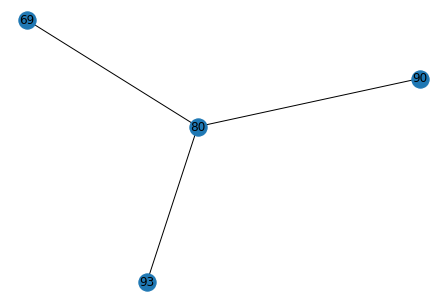

match_branches = [[80, 90], [69, 93]]
edges_to_delete (resolve crossover) = [[69, 80], [69, 90], [80, 93], [90, 93]]
edges_to_create (resolve crossover) = [[80, 90], [69, 93]]
curr_limb.deleted_edges 5 =[]
self.deleted_edges = []
self.created_edges = []
skip_nodes = []
edges_to_delete (cut_limb_network) = [[69, 80], [69, 90], [80, 93], [90, 93]]
edges_to_create = [[80, 90], [69, 93]]
Number of connected components = 2
Comp 0 = {1, 2, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 28, 30, 31, 32, 36, 37, 38, 39, 42, 43, 45, 46, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153}
Comp 1 = {0, 3, 4, 10, 19,

  Edge: [18 16]: curr_angle = 33.78
  Edge: [16 17]: curr_angle = 28.86
  Edge: [17 22]: curr_angle = 22.3
  Edge: [22 29]: curr_angle = 75.6
  Edge: [29 28]: curr_angle = 87.43
  Edge: [28 27]: curr_angle = 74.26

Total time for doubling_back = 0.4591186046600342

Attempting the width jump check (attempting from both sides)
self.deleted_edges = []
self.created_edges = []
  Edge: [18 16]: jump = -143.4
  Edge: [16 17]: jump = -209.54
  Edge: [17 22]: jump = -52.75
  Edge: [22 29]: jump = -153.65
  Edge: [29 28]: jump = -265.44
  Edge: [28 27]: jump = -20.26
Total time for width = 0.41230010986328125
Path starting at 18 had err_edges: []
self.deleted_edges = []
self.created_edges = []
  Edge: [27 28]: jump = -33.28
  Edge: [28 29]: jump = 26.12
  Edge: [29 22]: jump = 215.43
Adding error edge [29 22] because width jump was 215.42750548940094
  Edge: [22 17]: jump = 52.75
  Edge: [17 16]: jump = 209.54
Adding error edge [17 16] because width jump was 209.5392790102727
  Edge: [16 18]: ju

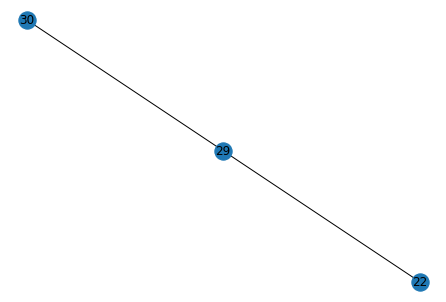

match_branches = [[22, 30]]
edges_to_delete (resolve crossover) = [[22, 29], [29, 30]]
edges_to_create (resolve crossover) = [[22, 30]]
edges_to_delete (cut_limb_network) = [array([22, 29]), array([29, 30])]
edges_to_create = [[22, 30]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 30, 32}
Comp 1 = {20, 23, 24, 25, 26, 27, 28, 29, 31}
curr_limb_copy.deleted_edges = [array([22, 29]), array([29, 30])]
curr_limb_copy.created_edges = [[22, 30]]
After get best cut: cut_edges = [array([22, 29]), array([29, 30])], added_edges = [[22, 30]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
self.deleted_edges = [array([22, 29]), array([29, 30])]
self.created_edges = [[22, 30]]
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection


---- working on disconnect

  Edge: [18 16]: curr_angle = 33.78
  Edge: [16 17]: curr_angle = 28.86
  Edge: [17 22]: curr_angle = 22.3
  Edge: [22 30]: curr_angle = 16.9

Total time for doubling_back = 0.3962714672088623

Attempting the width jump check (attempting from both sides)
self.deleted_edges = [array([22, 29]), array([29, 30])]
self.created_edges = [[22, 30]]
  Edge: [18 16]: jump = -143.4
  Edge: [16 17]: jump = -209.54
  Edge: [17 22]: jump = -52.75
  Edge: [22 30]: jump = -89.83
Total time for width = 0.36483097076416016
Path starting at 18 had err_edges: []
self.deleted_edges = [array([22, 29]), array([29, 30])]
self.created_edges = [[22, 30]]
  Edge: [30 22]: jump = 89.83
  Edge: [22 17]: jump = 52.75
  Edge: [17 16]: jump = 209.54
Adding error edge [17 16] because width jump was 209.5392790102727
  Edge: [16 18]: jump = 143.4
Total time for width = 0.36481809616088867
Path starting at 32 had err_edges: [[17, 16]]
first_error_sizes = [-inf, 209.5392790102727], winning_path = 1
***inside resolve cros

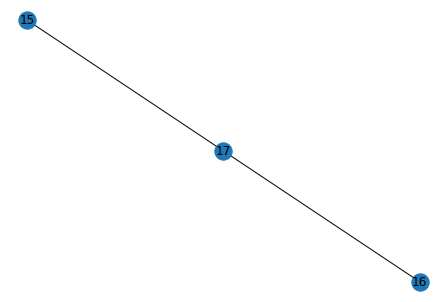

match_branches = [[15, 16]]
edges_to_delete (resolve crossover) = [[15, 17], [16, 17]]
edges_to_create (resolve crossover) = [[15, 16]]
edges_to_delete (cut_limb_network) = [array([15, 17]), array([16, 17])]
edges_to_create = [[15, 16]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18}
Comp 1 = {32, 17, 19, 21, 22, 30}
Comp 2 = {20, 23, 24, 25, 26, 27, 28, 29, 31}
curr_limb_copy.deleted_edges = [array([22, 29]), array([29, 30]), array([15, 17]), array([16, 17])]
curr_limb_copy.created_edges = [[22, 30], [15, 16]]
After get best cut: cut_edges = [array([15, 17]), array([16, 17])], added_edges = [[15, 16]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
self.deleted_edges = [array([22, 29]), array([29, 30]), array([15, 17]), array([16, 17])]
self.created_edges = [[22, 30], [15, 16]]
Total number of graphs at the end of the split A

In [9]:
limb_results = pru.multi_soma_split_suggestions(neuron_obj)

In [47]:
import numpy_utils as nu

In [60]:
cut_coordinates,not_cut_coordinates = get_all_cut_and_not_cut_path_coordinates(limb_results)
cut_coordinates

[array([181472.75 , 141597.   ,  19720.525]),
 array([181862.25 , 141329.25 ,  19640.225]),
 array([182300.  , 141637.5 ,  19455.45]),
 array([182361.31059015, 143936.21346123,  19901.57849759]),
 array([183155.75, 141098.25,  19394.35]),
 array([184422.25 , 141979.5  ,  19355.875]),
 array([185069.  , 156767.25,  19494.75]),
 array([185892.91428683, 157094.0840171 ,  19512.97700774]),
 array([186058.40864881, 156596.30467485,  19523.95052801]),
 array([187244.   , 148037.25 ,  20345.825]),
 array([182782.75 , 117348.5  ,  19320.875]),
 array([183708.5 , 129100.5 ,  19431.95]),
 array([184318.  , 138352.25,  19369.55]),
 array([189050.5  , 101405.75 ,  19453.175]),
 array([190176.62637182,  98868.82754244,  19571.89690034]),
 array([190502.08984734,  99145.10212595,  19528.64431164]),
 array([190582.6059407 ,  99116.05148739,  19567.85937415]),
 array([192009.14392974,  96552.67754138,  19512.2252716 ]),
 array([182782.75 , 117348.5  ,  19320.875]),
 array([183708.5 , 129100.5 ,  19431

In [11]:
split_coordinates = pru.get_all_coordinate_suggestions(limb_results)
split_coordinates

[array([182782.75 , 117348.5  ,  19320.875]),
 array([187244.   , 148037.25 ,  20345.825]),
 array([190502.08984734,  99145.10212595,  19528.64431164])]

In [12]:
slightly_off_split_coordinates = [k+100 for k in split_coordinates]

In [21]:
import matplotlib_utils as mu

In [25]:
mu.color_to_hex("white")

'#ffffff'

In [26]:
mu.color_to_hex("green")

'#008000'

In [61]:
sb_white = pru.set_state_builder(color="#ffffff")
original_df = pru.set_edit_dataframe(split_coordinates,neuron_obj.segment_id)

sb_green = pru.set_state_builder(color="#00CCCC")
off_df = pru.set_edit_dataframe(cut_coordinates,neuron_obj.segment_id)

In [62]:
# Chained state builder
chained_sb = statebuilder.ChainedStateBuilder([sb_white, sb_green])
chained_sb.render_state([original_df, off_df], return_as='html')

In [ ]:
neuroglancer_split_link(split_coordinates,
                          neuron_obj.segment_id)

In [ ]:
neuron_obj.mesh.merge_vertices()